## Capstone 2: Narrative Analytics and Experimentation

### Analyzing the dataset

This dataset contains historical sales data for 45 stores located in different regions - each store contains a number of departments. The company also runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks.

**Dataset Resource:** https://www.kaggle.com/manjeetsingh/retaildataset/downloads/retail-data-analytics.zip/2#stores%20data-set.csv


In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
sales = pd.read_csv('sales_data_set.csv')

In [59]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


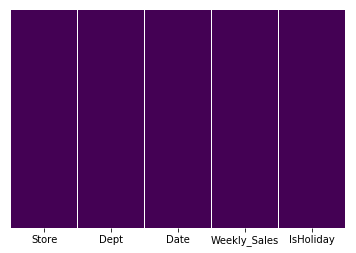

In [60]:
#Checking out if dataset hsa null values

sns.heatmap(sales.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [61]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [62]:
sales.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [63]:
#Verifying how many stores dataset has

len(sales['Store'].unique())


45

In [64]:
#Searching for negative sales per department

negative_sales = sales[sales['Weekly_Sales']<0][['Store','Dept','Weekly_Sales','IsHoliday']].sort_values(by='Weekly_Sales', ascending=True)
negative_sales['Dept'].value_counts().head(5)


47    254
18    180
54    146
19     87
94     77
Name: Dept, dtype: int64

array([254, 180, 146,  87,  77])

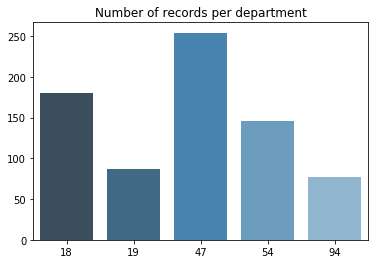

In [65]:
head = (negative_sales['Dept'].value_counts().head(5)) 
sns.barplot(head.index, head.values, palette="Blues_d").set_title('Number of records per department')
head.values

In [66]:
#Findng how much a department has lost
head=negative_sales[['Dept','Weekly_Sales']].groupby('Dept').sum().sort_values(by='Weekly_Sales', ascending=True).head(5)
head

,Weekly_Sales
Dept,
47,-53188.06
6,-5841.64
54,-4829.81
80,-4231.48
72,-3047.58


Text(0.5,1,'Sales per department')

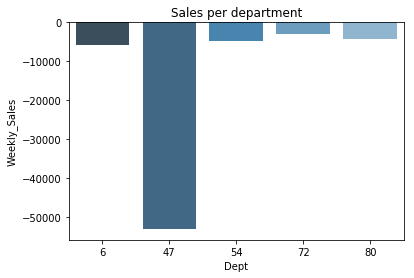

In [67]:
sns.barplot(head.index, head['Weekly_Sales'], palette="Blues_d").set_title('Sales per department')


# Research Proposal

## Problem: 

**The department 47 has the highest number is lost sales**

### Assumptions:

- Department 47 has items and services
- Sunday is the day with more customers traffic and highest sales


## Potential Solution:

- Highlight items & services from department 47 through displaying at the store entrance a container with items and services of department 47

- When a customer access to the store, he or she will receive a flyer with information related to items and services of departmemt 47. It will also contain a discount coupon for whatever item or service of department 47.

## Analysis that highlights your experimental hypothesis.

- Customer should have more visibility of items and services of department 47
- Customer should have an incentive to consume those products and services

## A rollout plan showing how you would implement and rollout the experiment


#### The rollout plan

- Beginning: Start with 5 stores (same size and similar sales) during 2 weeks 
- First Evaluation: Compare sales before and after the experiment
- Adding more stores to the experiment: Continue with 10 more stores (same size and similar sales) during next 2 weeks
- Second Evaluation: Compare sales before and after the experiment
- Running Decision Point 1
- Adding more stores: the plan is extended to 20 stores during 2 weeks 
- Third Evaluation: Compare sales before and after the experiment
- Runing Decision Point 2
- Adding more stores: the plan is extended to 10 stores during 2 weeks 
- Fourth Evaluation: Compare sales before and after the experiment
- Evaluate Results



**Special considerations**

- The beggining of the experiment should be avoiding any special season or holiday, it should start during regular season
- The experiment should start on Sunday, the day with highest sales
- The number of flyers is calculated regarding to the number of customer per day. Store should give a flyer to 50% of their customers everyday
- The flyer will be given in two different slot times. The first one, at the morning one hour after opening and the second one, during hours with more customers traffic in the store


**Decision Points**

- Decision point 1: There are 15 stores running the experiment at this moment. Depends of second evaluation's results the plan continues in this way:

    - If no store has an increase in department 47 sales, then the experiment will be cancelled
    - If more than a half of the stores, at least 8, has an increase in department 47 sales, then the experiment contiues
    - If less than a half of the stores, less than 8, has an increase in department 47 sales then the experiment contiues for those stores and the rollout will be stopped
    
    
- Decision point 2: There are 35 stores running the experiment at that moment, 15 of those stores have been running the experiment for 4 weeks. Depends of third evaluation's results the plan continues in this way:

    _Evaluating recent stores added to the experiment:_
    
    - If no store has an increase in department 47 sales, then the experiment will be cancelled for those stores.
    - If more than a half of the stores, at least 11, has an increase in department 47 sales, then the experiment contiues
    - If less than a half of the stores, less than 11, has an increase in department 47 sales then the experiment contiues for those stores and the rollout will be stopped
 
  _Evaluating the rest of the stores:_
     
    - If there are stores with sales decrease on department 47 then the experiment will be cancelled. Otherwise, experiment keep running.  

##  An evaluation plan showing what constitutes success in this experiment

- The rollout plan includes four evaluations and two decision points
- Success indicators:
    - The experiment was runned in 45 stores
    - More than 95% of the stores reduce negative sales on department 47
    - More than 80% of the stores have an increase on sales of department 47
    